In [1]:
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input, decode_predictions
import pandas as pd
from os import listdir
import cv2
import matplotlib.pyplot as plt

d:\apps\python 3.7.2\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
d:\apps\python 3.7.2\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
d:\apps\python 3.7.2\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.


In [2]:
# Helper functions

def normalize(img):
    min_val = np.min(img)
    max_val = np.max(img)
    return (img - min_val) / (max_val - min_val)


In [3]:
# Read labels

train_df = pd.read_csv('../data/trainLabels.csv', engine='python')

In [4]:
# Read images and append them to train_df

no_examples = 50_000
no_classes = 10
img_height = 32
img_width = 32
vgg_height = 224
vgg_width = 224
img_channels = 3
path_to_imgs = '../data/train/'

img_df = np.zeros((no_examples, img_height, img_width, img_channels))
for img_name in listdir(path_to_imgs):
    no = int(img_name.split('.')[0]) - 1
    img = load_img(path_to_imgs + img_name, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = preprocess_input(img)
    img_df[no] = img


In [5]:
# Let's replace labels with 0-9 numbers and do one-hot encoding

labels_dict = list(pd.unique(train_df['label']))
labels_dict = dict(zip(labels_dict, range(no_classes)))
labels = np.zeros((no_examples, no_classes))
for i, elem in enumerate(train_df['label']):
    labels[i][labels_dict[elem]] = 1

In [6]:
# Let's try to use VGG19 to make predictions on our set.
# We replace dense layers in VGG19 with our own

vgg19 = keras.applications.vgg19.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, img_channels))

for layer in vgg19.layers:
    layer.trainable = False

model = Sequential(layers=vgg19.layers)
model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(10))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()
#vgg19.summary()
#print(model.layers[0].get_weights()[0][0][0][0])
#print(vgg19.layers[1].get_weights()[0][0][0][0])

W0413 22:44:58.652997 13540 deprecation_wrapper.py:119] From d:\apps\python 3.7.2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0413 22:44:59.349771 13540 deprecation_wrapper.py:119] From d:\apps\python 3.7.2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0413 22:44:59.639349 13540 deprecation_wrapper.py:119] From d:\apps\python 3.7.2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0413 22:45:00.057705 13540 deprecation_wrapper.py:119] From d:\apps\python 3.7.2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0413 22:45:00.874514 13540 deprecation_wrapper.py:119] From d:\apps\python 3.7.2\lib\site-pack

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         295168    
__________

In [ ]:
# Training

history = model.fit(img_df, labels,
                    batch_size=256,
                    validation_split=0.1,
                    epochs=100)

W0413 22:46:06.359293 13540 deprecation.py:323] From d:\apps\python 3.7.2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 29s 643us/step - loss: 8.0867 - val_loss: 7.0012
Epoch 2/100
45000/45000 [==============================] - 21s 466us/step - loss: 7.9337 - val_loss: 7.8308
Epoch 3/100
45000/45000 [==============================] - 21s 465us/step - loss: 7.5782 - val_loss: 6.4686
Epoch 4/100
45000/45000 [==============================] - 21s 471us/step - loss: 7.4369 - val_loss: 8.1143
Epoch 5/100
45000/45000 [==============================] - 21s 474us/step - loss: 8.6306 - val_loss: 7.9316
Epoch 6/100
45000/45000 [==============================] - 21s 474us/step - loss: 8.3481 - val_loss: 9.1597
Epoch 7/100
45000/45000 [==============================] - 21s 469us/step - loss: 8.2399 - val_loss: 7.1349
Epoch 8/100
45000/45000 [==============================] - 21s 468us/step - loss: 7.6944 - val_loss: 7.1697
Epoch 9/100
45000/45000 [==============================] - 21s 472us/step - loss: 6.907

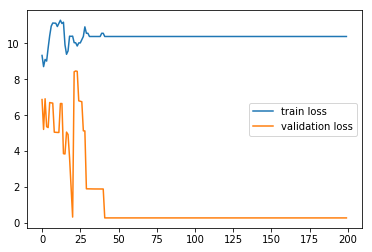

In [22]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()